In [37]:
import pandas as pd

data = pd.read_csv('property_listing_data_in_Bangladesh.csv')
data = data.drop(data.index[data["type"].isin(["Duplex","Bulding Type"])], axis=0)
data.drop(['title','adress','type','purpose','flooPlan','url','lastUpdated'], axis=1, inplace=True)

In [38]:
def convert_to_numeric(value):
    value = value.replace(',', '').strip()
    if 'Thousand' in value:
        value = value.replace('Thousand', '')
        value = float(value) * 1000
    elif 'Lakh' in value:
        value = value.replace('Lakh', '')
        value = float(value) * 100000
    return value

data['area'] = data['area'].astype(str).str.strip().replace(',', '', regex=True)
data['beds'] = data['beds'].replace('Bed', '', regex=True).str.strip()
data['bath'] = data['bath'].replace('Bath', '', regex=True).str.strip()
data['price'] = data['price'].apply(convert_to_numeric).astype(float)


In [39]:
data.head

<bound method NDFrame.head of      beds bath       area     price
0       3    4  2200 sqft   50000.0
1       3    4  1400 sqft   30000.0
2       3    4  1950 sqft   30000.0
3       3    3  2000 sqft   35000.0
4       3    4  1650 sqft   25000.0
...   ...  ...        ...       ...
7551    3    4  1888 sqft   50000.0
7553    3    2   900 sqft   19000.0
7554    2    2  1000 sqft   22000.0
7555    3    4  3600 sqft  175000.0
7556    4    4  2600 sqft   90000.0

[7510 rows x 4 columns]>

In [40]:
data['area'] = data['area'].str.replace(' sqft', '').astype(int)
data['beds'] = data['beds'].astype(int)
data['bath'] = data['bath'].astype(int)


In [41]:
data.head

<bound method NDFrame.head of       beds  bath  area     price
0        3     4  2200   50000.0
1        3     4  1400   30000.0
2        3     4  1950   30000.0
3        3     3  2000   35000.0
4        3     4  1650   25000.0
...    ...   ...   ...       ...
7551     3     4  1888   50000.0
7553     3     2   900   19000.0
7554     2     2  1000   22000.0
7555     3     4  3600  175000.0
7556     4     4  2600   90000.0

[7510 rows x 4 columns]>

In [42]:
X = data.loc[:, ['beds', 'bath', 'area']]
y = data['price']


In [43]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    squared_errors = np.square(predictions - y)
    cost = np.sum(squared_errors) / (2 * m)
    return cost

In [44]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    dw = np.dot(errors, X) / m
    db = np.sum(errors) / m
    return dw, db
    dw = np.zeros_like(w)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test_val, y_train,y_test_val = train_test_split(X,y,test_size=0.2,random_state=47)
X_val,X_test,y_val,y_test = train_test_split(X_test_val,y_test_val,test_size = 0.5,random_state = 47)



In [46]:
import numpy as np
X_train.shape[1]
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values
X_val = X_val.values
y_val = y_val.values

In [57]:
mean = np.mean(X_train,axis = 0)
std = np.std(X_train,axis =0)
X_train_normalized = (X_train-mean)/std
X_test_normalized = (X_test-mean)/std
X_val_normalized = (X_val-mean)/std
mean = np.mean(y_train,axis = 0)
std = np.std(y_train,axis =0)
y_train_normalized = (y_train-mean)/std
y_test_normalized = (y_test-mean)/std
y_val_normalized = (y_val-mean)/std

In [58]:
print(y_test[2])
print(y_test_normalized[1])

40000.0
-0.18942137862978656


In [50]:
def gradient_descent(X_train, y_train, X_val, y_val, w, b, compute_cost, learning_rate, epochs):
    m = X_train.shape[0]  # Number of training examples
    costs = []  # List to store the cost at each epoch

    for epoch in range(epochs):
        # Compute gradients using the compute_gradient function
        dw, db = compute_gradient(X_train, y_train, w, b)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute and store the cost for monitoring
        cost_train = compute_cost(X_train, y_train, w, b)
        cost_val = compute_cost(X_val, y_val, w, b)
        costs.append(cost_train)

        # Print the cost at each epoch (optional)
        print("Epoch {}: Training Cost = {}, Validation Cost = {}".format(epoch+1, cost_train, cost_val))

    # Return the final costs, weights, and bias
    return costs, w, b



In [51]:
import numpy as np

# Initialize w with random values
w = np.random.randn(X_train_normalized.shape[1])

# Define the gradient descent function (gradient_descent) elsewhere in your code

# Rest of the code
b = 0
epochs = 50
theta = 0.03
# Assuming compute_cost is a function that computes the cost
costs, w_final, b_final = gradient_descent(X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, w, b, compute_cost, theta, epochs)


Epoch 1: Training Cost = 1.4010461448854332, Validation Cost = 1.373767525698507
Epoch 2: Training Cost = 1.2275828636828507, Validation Cost = 1.2232399036158552
Epoch 3: Training Cost = 1.0791800999885535, Validation Cost = 1.0938823663630752
Epoch 4: Training Cost = 0.9521925116337403, Validation Cost = 0.982659194639292
Epoch 5: Training Cost = 0.8435053629040429, Validation Cost = 0.886973104242824
Epoch 6: Training Cost = 0.7504572853048612, Validation Cost = 0.8046016974633382
Epoch 7: Training Cost = 0.6707742819717187, Validation Cost = 0.7336431435276126
Epoch 8: Training Cost = 0.6025133389967051, Validation Cost = 0.6724697463343899
Epoch 9: Training Cost = 0.5440142451994924, Validation Cost = 0.6196882529009585
Epoch 10: Training Cost = 0.49385842544589814, Validation Cost = 0.5741059227282355
Epoch 11: Training Cost = 0.4508337665572434, Validation Cost = 0.5347015208060488
Epoch 12: Training Cost = 0.4139045634736823, Validation Cost = 0.5006005187581558
Epoch 13: Train

In [55]:
print(w)

[0.2119576  0.0840423  0.47531327]


In [56]:
print(b)

0


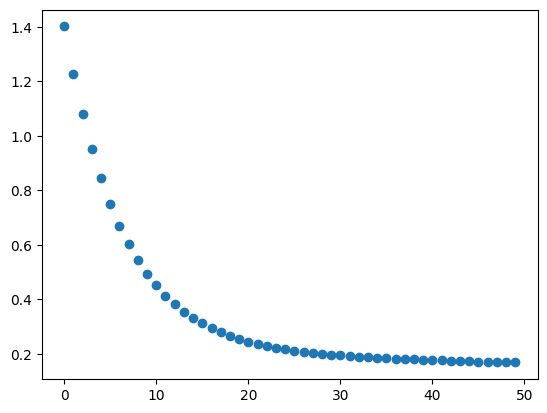

In [52]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,50)),y=costs)
plt.show()